<a href="https://colab.research.google.com/github/nikogarro/Data-Science/blob/main/Web-scraping-for-British-Airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [34]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [35]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Quick bag drop at First Wing but too many passengers so had to use fast track security in main terminal. Direct entry to Concorde room outside security south. Ate excellent breakfast which was served promptly. Concorde room is a nice place to wait for a flight there is some interesting memorabilia and an excellent bar. Boarding from c gates was disorganised and slow. On board cabin crew excellent. Good choice of beverages and these were of high quality. Food was good. Seat comfortable. No first bedding provided. On time arrival into Miami. Baggage took 1 hour to arrive
1,"✅ Trip Verified | 4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing."
2,"✅ Trip Verified | I recently had a delay on British Airways from BRU to LHR that was due to staff shortages. They announced that there was a 2 hour holding delay but they would board us immediately in hopes of clearing the gate and leaving early. We had to wait the full 2 hours inside the airplane. The plane was old, dirty, had no power at the seats. The staff provided a small bag of pretzels and 250ml of water to the passengers for 2 hour delay and 2 hour flight. There were no options to purchase food or drink. There were no entertainment options available. I am a OneWorld emerald elite member but they do not upgrade members based on status. First class lounges at Heathrow are overcrowded, understaffed and poorly equipped. The help desk is completely unhelpful when an error arises with delays and cancellations - even when having the top status. The Avios points system has been devalued to near worthlessness and requires fees to book reward that nearly equal the price of the revenue ticket. British has lost its way in recent years and has a moved from a world-class airline to a budget airline with much worse service and timeliness than Ryanair or EasyJet."
3,"Not Verified | Boarded on time, but it took ages to get to the runway due to congestion. Flight was smooth and quick. Snack and drinks were good for a short flight. Landed only about ten minutes late. One bag of three left in London, forms quickly filled in, and the bag was delivered the next morning."
4,"✅ Trip Verified | 5 days before the flight, we were advised by BA that it had been cancelled and asked us to rebook. There were flights 1 hour before and 1 hour after our original flight but they made us take one 3 hours earlier. Our original ticket (and the return flight a week later) included a checked bag. When we arrive at Heathrow to check in we are told our ticket doesn't included a bag and we will have to pay 75 pounds each to take them. We explained that the original ticket had the bags and when they checked the system they confirmed that it did- but not this one! They would make no effort to sort it out and just told us to pay up or they would remove us from the flight. So we had no choice but to pay up, thinking it should be pretty easy to get a refund. 15 months and 10 emails later we have still not seen a penny. Every time I ask where my refund is and state how long we have been waiting I get an inane email saying some departments take longer than others to respond! Absolutely hopeless airline to stuff up the booking in the first place and even worse customer service to not even attempt to solve the problem at check in even when they could see the mistake THEY had made 

In [37]:
df.to_csv("./BA_reviews.csv")

In [38]:
data = pd.read_csv("BA_reviews.csv", index_col=0)
data.head()

,reviews
0,✅ Trip Verified | Quick bag drop at First Wing but too many passengers so had to use fast track security in main terminal. Direct entry to Concorde room outside security south. Ate excellent breakfast which was served promptly. Concorde room is a nice place to wait for a flight there is some interesting memorabilia and an excellent bar. Boarding from c gates was disorganised and slow. On board cabin crew excellent. Good choice of beverages and these were of high quality. Food was good. Seat comfortable. No first bedding provided. On time arrival into Miami. Baggage took 1 hour to arrive
1,"✅ Trip Verified | 4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing."
2,"✅ Trip Verified | I recently had a delay on British Airways from BRU to LHR that was due to staff shortages. They announced that there was a 2 hour holding delay but they would board us immediately in hopes of clearing the gate and leaving early. We had to wait the full 2 hours inside the airplane. The plane was old, dirty, had no power at the seats. The staff provided a small bag of pretzels and 250ml of water to the passengers for 2 hour delay and 2 hour flight. There were no options to purchase food or drink. There were no entertainment options available. I am a OneWorld emerald elite member but they do not upgrade members based on status. First class lounges at Heathrow are overcrowded, understaffed and poorly equipped. The help desk is completely unhelpful when an error arises with delays and cancellations - even when having the top status. The Avios points system has been devalued to near worthlessness and requires fees to book reward that nearly equal the price of the revenue ticket. British has lost its way in recent years and has a moved from a world-class airline to a budget airline with much worse service and timeliness than Ryanair or EasyJet."
3,"Not Verified | Boarded on time, but it took ages to get to the runway due to congestion. Flight was smooth and quick. Snack and drinks were good for a short flight. Landed only about ten minutes late. One bag of three left in London, forms quickly filled in, and the bag was delivered the next morning."
4,"✅ Trip Verified | 5 days before the flight, we were advised by BA that it had been cancelled and asked us to rebook. There were flights 1 hour before and 1 hour after our original flight but they made us take one 3 hours earlier. Our original ticket (and the return flight a week later) included a checked bag. When we arrive at Heathrow to check in we are told our ticket doesn't included a bag and we will have to pay 75 pounds each to take them. We explained that the original ticket had the bags and when they checked the system they confirmed that it did- but not this one! They would make no effort to sort it out and just told us to pay up or they would remove us from the flight. So we had no choice but to pay up, thinking it should be pretty easy to get a refund. 15 months and 10 emails later we have still not seen a penny. Every time I ask where my refund is and state how long we have been waiting I get an inane email saying some departments take longer than others to respond! Absolutely hopeless airline to stuff up the booking in the first place and even worse customer service to not even attempt to solve the problem at check in even when they could see the mistake THEY had made 

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [39]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [40]:
df

,reviews
0,Quick bag drop at First Wing but too many passengers so had to use fast track security in main terminal. Direct entry to Concorde room outside security south. Ate excellent breakfast which was served promptly. Concorde room is a nice place to wait for a flight there is some interesting memorabilia and an excellent bar. Boarding from c gates was disorganised and slow. On board cabin crew excellent. Good choice of beverages and these were of high quality. Food was good. Seat comfortable. No first bedding provided. On time arrival into Miami. Baggage took 1 hour to arrive
1,"4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing."
2,"I recently had a delay on British Airways from BRU to LHR that was due to staff shortages. They announced that there was a 2 hour holding delay but they would board us immediately in hopes of clearing the gate and leaving early. We had to wait the full 2 hours inside the airplane. The plane was old, dirty, had no power at the seats. The staff provided a small bag of pretzels and 250ml of water to the passengers for 2 hour delay and 2 hour flight. There were no options to purchase food or drink. There were no entertainment options available. I am a OneWorld emerald elite member but they do not upgrade members based on status. First class lounges at Heathrow are overcrowded, understaffed and poorly equipped. The help desk is completely unhelpful when an error arises with delays and cancellations - even when having the top status. The Avios points system has been devalued to near worthlessness and requires fees to book reward that nearly equal the price of the revenue ticket. British has lost its way in recent years and has a moved from a world-class airline to a budget airline with much worse service and timeliness than Ryanair or EasyJet."
3,"Boarded on time, but it took ages to get to the runway due to congestion. Flight was smooth and quick. Snack and drinks were good for a short flight. Landed only about ten minutes late. One bag of three left in London, forms quickly filled in, and the bag was delivered the next morning."
4,"5 days before the flight, we were advised by BA that it had been cancelled and asked us to rebook. There were flights 1 hour before and 1 hour after our original flight but they made us take one 3 hours earlier. Our original ticket (and the return flight a week later) included a checked bag. When we arrive at Heathrow to check in we are told our ticket doesn't included a bag and we will have to pay 75 pounds each to take them. We explained that the original ticket had the bags and when they checked the system they confirmed that it did- but not this one! They would make no effort to sort it out and just told us to pay up or they would remove us from the flight. So we had no choice but to pay up, thinking it should be pretty easy to get a refund. 15 months and 10 emails later we have still not seen a penny. Every time I ask where my refund is and state how long we have been waiting I get an inane email saying some departments take longer than others to respond! Absolutely hopeless airline to stuff up the booking in the first place and even worse customer service to not even attempt to solve the problem at check in even when they could see the mistake THEY had made in their system, compounded by being be unable to investigate a very simple claim, and 

In [41]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Quick bag drop at First Wing but too many passengers so had to use fast track security in main terminal. Direct entry to Concorde room outside security south. Ate excellent breakfast which was served promptly. Concorde room is a nice place to wait for a flight there is some interesting memorabilia and an excellent bar. Boarding from c gates was disorganised and slow. On board cabin crew excellent. Good choice of beverages and these were of high quality. Food was good. Seat comfortable. No first bedding provided. On time arrival into Miami. Baggage took 1 hour to arrive,Quick bag drop at First Wing but too many passengers so had to use fast track security in main terminal Direct entry to Concorde room outside security south Ate excellent breakfast which was served promptly Concorde room is a nice place to wait for a flight there is some interesting memorabilia and an excellent bar Boarding from c gates was disorganised and slow On board cabin crew excellent Good choice of beverages and these were of high quality Food was good Seat comfortable No first bedding provided On time arrival into Miami Baggage took hour to arrive
1,"4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing.",Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time So did the capacity of the Heathrow Airport really hit British Airways by surprise h before departure Anyhow we took the one hour delay so what but then we have been forced to check in our Hand luggage I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage Overall h later at home than planed with really no reason just due to incompetent people Service level far worse then Ryanair and triple the price Really never again Thanks for nothing
2,"I recently had a delay on British Airways from BRU to LHR that was due to staff shortages. They announced that there was a 2 hour holding delay but they would board us immediately in hopes of clearing the gate and leaving early. We had to wait the full 2 hours inside the airplane. The plane was old, dirty, had no power at the seats. The staff provided a small bag of pretzels and 250ml of water to the passengers for 2 hour delay and 2 hour flight. There were no options to purchase food or drink. There were no entertainment options available. I am a OneWorld emerald elite member but they do not upgrade members based on status. First class lounges at Heathrow are overcrowded, understaffed and poorly equipped. The help desk is completely unhelpful when an error arises with delays and cancellations - even when having the top status. The Avios points system has been devalued to near worthlessness and requires fees to book reward that nearly equal the price of the revenue ticket. British has lost its way in recent years and has a moved from a world-class airline to a budget airline with much worse service and timeliness than Ryanair or EasyJet.",I recently had a delay on British Airways from BRU to LHR that was due to staff shortages They announced that there was a hour holding delay but they would board us immediately in hopes of clearing the gate and leaving early We had to wait the full hours inside the airplane The plane was old dirty had no power at the 

In [42]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,Quick bag drop at First Wing but too many passengers so had to use fast track security in main terminal. Direct entry to Concorde room outside security south. Ate excellent breakfast which was served promptly. Concorde room is a nice place to wait for a flight there is some interesting memorabilia and an excellent bar. Boarding from c gates was disorganised and slow. On board cabin crew excellent. Good choice of beverages and these were of high quality. Food was good. Seat comfortable. No first bedding provided. On time arrival into Miami. Baggage took 1 hour to arrive,Quick bag drop at First Wing but too many passengers so had to use fast track security in main terminal Direct entry to Concorde room outside security south Ate excellent breakfast which was served promptly Concorde room is a nice place to wait for a flight there is some interesting memorabilia and an excellent bar Boarding from c gates was disorganised and slow On board cabin crew excellent Good choice of beverages and these were of high quality Food was good Seat comfortable No first bedding provided On time arrival into Miami Baggage took hour to arrive,"[(Quick, n), (bag, n), (drop, n), (First, n), (Wing, n), (many, a), (passengers, n), (use, v), (fast, a), (track, n), (security, n), (main, a), (terminal, a), (Direct, n), (entry, n), (Concorde, n), (room, n), (outside, None), (security, n), (south, a), (Ate, n), (excellent, n), (breakfast, n), (served, v), (promptly, r), (Concorde, n), (room, n), (nice, a), (place, n), (wait, v), (flight, n), (interesting, a), (memorabilia, n), (excellent, a), (bar, n), (Boarding, n), (c, n), (gates, n), (disorganised, v), (slow, v), (board, n), (cabin, n), (crew, v), (excellent, a), (Good, n), (choice, n), (beverages, n), (high, a), (quality, n), (Food, n), (good, a), (Seat, n), (comfortable, a), (first, r), (bedding, v), (provided, v), (time, n), (arrival, n), (Miami, n), (Baggage, n), (took, v), (hour, n), (arrive, v)]"
1,"4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing.",Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time So did the capacity of the Heathrow Airport really hit British Airways by surprise h before departure Anyhow we took the one hour delay so what but then we have been forced to check in our Hand luggage I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage Overall h later at home than planed with really no reason just due to incompetent people Service level far worse then Ryanair and triple the price Really never again Thanks for nothing,"[(Hours, n), (takeoff, n), (received, v), (Mail, n), (stating, v), (cryptic, a), (message, n), (disruptions, n), (expected, v), (limit, n), (many, a), (planes, n), (leave, v), (time, n), (capacity, n), (Heathrow, n), (Airport, n), (really, r), (hit, v), (British, a), (Airways, n), (surprise, n), (h, n), (departure, n), (Anyhow, n), (took, v), (one, None), (hour, n), (delay, n), (forced, v), (check, v), (Hand, n), (luggage, n), (travel, v), (hand, n), (luggage, n), (avoid, v), (waiting, v), (ultra, a), (slow, a), (processing, n), (checked, v), (luggage, n), (Overall, a), (h, n), (later, r), (home, n), (planed, v), (really, r), (reason, n), 

In [44]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Quick bag drop at First Wing but too many passengers so had to use fast track security in main terminal. Direct entry to Concorde room outside security south. Ate excellent breakfast which was served promptly. Concorde room is a nice place to wait for a flight there is some interesting memorabilia and an excellent bar. Boarding from c gates was disorganised and slow. On board cabin crew excellent. Good choice of beverages and these were of high quality. Food was good. Seat comfortable. No first bedding provided. On time arrival into Miami. Baggage took 1 hour to arrive,Quick bag drop at First Wing but too many passengers so had to use fast track security in main terminal Direct entry to Concorde room outside security south Ate excellent breakfast which was served promptly Concorde room is a nice place to wait for a flight there is some interesting memorabilia and an excellent bar Boarding from c gates was disorganised and slow On board cabin crew excellent Good choice of beverages and these were of high quality Food was good Seat comfortable No first bedding provided On time arrival into Miami Baggage took hour to arrive,"[(Quick, n), (bag, n), (drop, n), (First, n), (Wing, n), (many, a), (passengers, n), (use, v), (fast, a), (track, n), (security, n), (main, a), (terminal, a), (Direct, n), (entry, n), (Concorde, n), (room, n), (outside, None), (security, n), (south, a), (Ate, n), (excellent, n), (breakfast, n), (served, v), (promptly, r), (Concorde, n), (room, n), (nice, a), (place, n), (wait, v), (flight, n), (interesting, a), (memorabilia, n), (excellent, a), (bar, n), (Boarding, n), (c, n), (gates, n), (disorganised, v), (slow, v), (board, n), (cabin, n), (crew, v), (excellent, a), (Good, n), (choice, n), (beverages, n), (high, a), (quality, n), (Food, n), (good, a), (Seat, n), (comfortable, a), (first, r), (bedding, v), (provided, v), (time, n), (arrival, n), (Miami, n), (Baggage, n), (took, v), (hour, n), (arrive, v)]",Quick bag drop First Wing many passenger use fast track security main terminal Direct entry Concorde room outside security south Ate excellent breakfast serve promptly Concorde room nice place wait flight interesting memorabilia excellent bar Boarding c gate disorganise slow board cabin crew excellent Good choice beverage high quality Food good Seat comfortable first bed provide time arrival Miami Baggage take hour arrive
1,"4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing.",Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time So did the capacity of the Heathrow Airport really hit British Airways by surprise h before departure Anyhow we took the one hour delay so what but then we have been forced to check in our Hand luggage I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage Overall h later at home than planed with really no reason just due to incompetent people Service level far worse then Ryanair and triple the price Really never again Thanks for nothing,"[(Hours, n), (takeoff, n), (received, v), (Mail, n), (stating, v), (cryptic, a), (message, n), (disruptions, n), (expected, v), (limit, n), (many, a), (planes, n), (leave, v), (time, n), (capacity, n), (Heathrow, n)

In [45]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Quick bag drop at First Wing but too many passengers so had to use fast track security in main terminal. Direct entry to Concorde room outside security south. Ate excellent breakfast which was served promptly. Concorde room is a nice place to wait for a flight there is some interesting memorabilia and an excellent bar. Boarding from c gates was disorganised and slow. On board cabin crew excellent. Good choice of beverages and these were of high quality. Food was good. Seat comfortable. No first bedding provided. On time arrival into Miami. Baggage took 1 hour to arrive,Quick bag drop First Wing many passenger use fast track security main terminal Direct entry Concorde room outside security south Ate excellent breakfast serve promptly Concorde room nice place wait flight interesting memorabilia excellent bar Boarding c gate disorganise slow board cabin crew excellent Good choice beverage high quality Food good Seat comfortable first bed provide time arrival Miami Baggage take hour arrive
1,"4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing.",Hours takeoff receive Mail state cryptic message disruption expect limit many plane leave time capacity Heathrow Airport really hit British Airways surprise h departure Anyhow take one hour delay force check Hand luggage travel hand luggage avoid wait ultra slow processing check luggage Overall h later home plan really reason due incompetent people Service level far bad Ryanair triple price Really never Thanks nothing
2,"I recently had a delay on British Airways from BRU to LHR that was due to staff shortages. They announced that there was a 2 hour holding delay but they would board us immediately in hopes of clearing the gate and leaving early. We had to wait the full 2 hours inside the airplane. The plane was old, dirty, had no power at the seats. The staff provided a small bag of pretzels and 250ml of water to the passengers for 2 hour delay and 2 hour flight. There were no options to purchase food or drink. There were no entertainment options available. I am a OneWorld emerald elite member but they do not upgrade members based on status. First class lounges at Heathrow are overcrowded, understaffed and poorly equipped. The help desk is completely unhelpful when an error arises with delays and cancellations - even when having the top status. The Avios points system has been devalued to near worthlessness and requires fees to book reward that nearly equal the price of the revenue ticket. British has lost its way in recent years and has a moved from a world-class airline to a budget airline with much worse service and timeliness than Ryanair or EasyJet.",recently delay British Airways BRU LHR due staff shortage announce hour hold delay would board us immediately hope clear gate leave early wait full hour inside airplane plane old dirty power seat staff provide small bag pretzel ml water passenger hour delay hour flight option purchase food drink entertainment option available OneWorld emerald elite member upgrade member base status First class lounge Heathrow overcrowd understaffed poorly equip help desk completely unhelpful error arise delay cancellation even top status Avios point system devalue near worthlessness require fee book reward nearly equal price revenue ticket British lose way recent year move world class airline budget airline much bad s

In [65]:
df

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Quick bag drop at First Wing but too many passengers so had to use fast track security in main terminal. Direct entry to Concorde room outside security south. Ate excellent breakfast which was served promptly. Concorde room is a nice place to wait for a flight there is some interesting memorabilia and an excellent bar. Boarding from c gates was disorganised and slow. On board cabin crew excellent. Good choice of beverages and these were of high quality. Food was good. Seat comfortable. No first bedding provided. On time arrival into Miami. Baggage took 1 hour to arrive,Quick bag drop at First Wing but too many passengers so had to use fast track security in main terminal Direct entry to Concorde room outside security south Ate excellent breakfast which was served promptly Concorde room is a nice place to wait for a flight there is some interesting memorabilia and an excellent bar Boarding from c gates was disorganised and slow On board cabin crew excellent Good choice of beverages and these were of high quality Food was good Seat comfortable No first bedding provided On time arrival into Miami Baggage took hour to arrive,"[(Quick, n), (bag, n), (drop, n), (First, n), (Wing, n), (many, a), (passengers, n), (use, v), (fast, a), (track, n), (security, n), (main, a), (terminal, a), (Direct, n), (entry, n), (Concorde, n), (room, n), (outside, None), (security, n), (south, a), (Ate, n), (excellent, n), (breakfast, n), (served, v), (promptly, r), (Concorde, n), (room, n), (nice, a), (place, n), (wait, v), (flight, n), (interesting, a), (memorabilia, n), (excellent, a), (bar, n), (Boarding, n), (c, n), (gates, n), (disorganised, v), (slow, v), (board, n), (cabin, n), (crew, v), (excellent, a), (Good, n), (choice, n), (beverages, n), (high, a), (quality, n), (Food, n), (good, a), (Seat, n), (comfortable, a), (first, r), (bedding, v), (provided, v), (time, n), (arrival, n), (Miami, n), (Baggage, n), (took, v), (hour, n), (arrive, v)]",Quick bag drop First Wing many passenger use fast track security main terminal Direct entry Concorde room outside security south Ate excellent breakfast serve promptly Concorde room nice place wait flight interesting memorabilia excellent bar Boarding c gate disorganise slow board cabin crew excellent Good choice beverage high quality Food good Seat comfortable first bed provide time arrival Miami Baggage take hour arrive
1,"4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing.",Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time So did the capacity of the Heathrow Airport really hit British Airways by surprise h before departure Anyhow we took the one hour delay so what but then we have been forced to check in our Hand luggage I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage Overall h later at home than planed with really no reason just due to incompetent people Service level far worse then Ryanair and triple the price Really never again Thanks for nothing,"[(Hours, n), (takeoff, n), (received, v), (Mail, n), (stating, v), (cryptic, a), (message, n), (disruptions, n), (expected, v), (limit, n), (many, a), (planes, n), (leave, v), (time, n), (capacity, n), (Heathrow, n)

In [66]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [67]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Quick bag drop at First Wing but too many passengers so had to use fast track security in main terminal. Direct entry to Concorde room outside security south. Ate excellent breakfast which was served promptly. Concorde room is a nice place to wait for a flight there is some interesting memorabilia and an excellent bar. Boarding from c gates was disorganised and slow. On board cabin crew excellent. Good choice of beverages and these were of high quality. Food was good. Seat comfortable. No first bedding provided. On time arrival into Miami. Baggage took 1 hour to arrive,Quick bag drop at First Wing but too many passengers so had to use fast track security in main terminal Direct entry to Concorde room outside security south Ate excellent breakfast which was served promptly Concorde room is a nice place to wait for a flight there is some interesting memorabilia and an excellent bar Boarding from c gates was disorganised and slow On board cabin crew excellent Good choice of beverages and these were of high quality Food was good Seat comfortable No first bedding provided On time arrival into Miami Baggage took hour to arrive,"[(Quick, n), (bag, n), (drop, n), (First, n), (Wing, n), (many, a), (passengers, n), (use, v), (fast, a), (track, n), (security, n), (main, a), (terminal, a), (Direct, n), (entry, n), (Concorde, n), (room, n), (outside, None), (security, n), (south, a), (Ate, n), (excellent, n), (breakfast, n), (served, v), (promptly, r), (Concorde, n), (room, n), (nice, a), (place, n), (wait, v), (flight, n), (interesting, a), (memorabilia, n), (excellent, a), (bar, n), (Boarding, n), (c, n), (gates, n), (disorganised, v), (slow, v), (board, n), (cabin, n), (crew, v), (excellent, a), (Good, n), (choice, n), (beverages, n), (high, a), (quality, n), (Food, n), (good, a), (Seat, n), (comfortable, a), (first, r), (bedding, v), (provided, v), (time, n), (arrival, n), (Miami, n), (Baggage, n), (took, v), (hour, n), (arrive, v)]",Quick bag drop First Wing many passenger use fast track security main terminal Direct entry Concorde room outside security south Ate excellent breakfast serve promptly Concorde room nice place wait flight interesting memorabilia excellent bar Boarding c gate disorganise slow board cabin crew excellent Good choice beverage high quality Food good Seat comfortable first bed provide time arrival Miami Baggage take hour arrive,0.9806,Positive
1,"4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed, with really no reason, just due to incompetent people. Service level far worse then Ryanair and triple the price. Really never again. Thanks for nothing.",Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time So did the capacity of the Heathrow Airport really hit British Airways by surprise h before departure Anyhow we took the one hour delay so what but then we have been forced to check in our Hand luggage I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage Overall h later at home than planed with really no reason just due to incompetent people Service level far worse then Ryanair and triple the price Really never again Thanks for nothing,"[(Hours, n), (takeoff, n), (received, v), (Mail, n), (stating, v), (cryptic, a), (message, n), (disruptions, n), (expected, v), (limit, n), (many, a), (planes, n), (leave, v), (tim

In [68]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    480
Negative    412
Neutral     108
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x797886c1d8d0>,
 [Text(0.0690696084852792, 1.0978293989430645, 'Positive'),
  Text(-0.4305111002419281, -1.0122550037260791, 'Negative'),
  Text(1.2730371984675077, -0.44930645590509777, 'Neutral')],
 [Text(0.03767433190106138, 0.598816035787126, '48.0%'),
  Text(-0.23482423649559714, -0.5521390929414977, '41.2%'),
  Text(0.8015419397758381, -0.2828966574217282, '10.8%')])

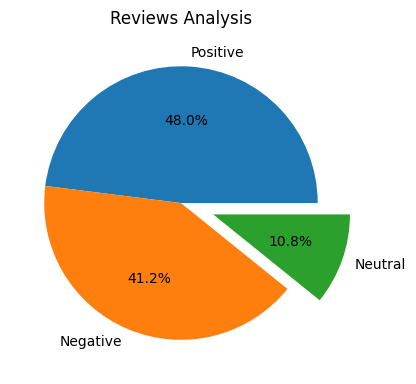

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [71]:
df.to_csv("BA_reviews.csv")

In [82]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [93]:
import numpy as np
from PIL import Image

In [142]:
plane_coloring = np.array(Image.open("/content/plane-graphic-clipart-design-free-png.png"))

In [143]:
plane_coloring

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [144]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [145]:
# Transform your mask into a new one that will work with the function:
transformed_plane_coloring = np.ndarray((plane_coloring.shape[0],plane_coloring.shape[1]), np.int32)

for i in range(len(plane_coloring)):
    transformed_plane_coloring[i] = list(map(transform_format, transformed_plane_coloring[i]))

In [146]:
transformed_plane_coloring

array([[-744209248,      31097, 1236717392, ...,        255,        255,
               255],
       [       255,        255,        255, ...,        255,        255,
               255],
       [       255,        255,        255, ...,        255,        255,
               255],
       ...,
       [       255,        255,        255, ...,        255,        255,
               255],
       [       255,        255,        255, ...,        255,        255,
               255],
       [       255,        255,        255, ...,        255,        255,
               255]], dtype=int32)

In [79]:
plane_coloring = np.array(Image.open("/content/plane-graphic-clipart-design-free-png.png"))

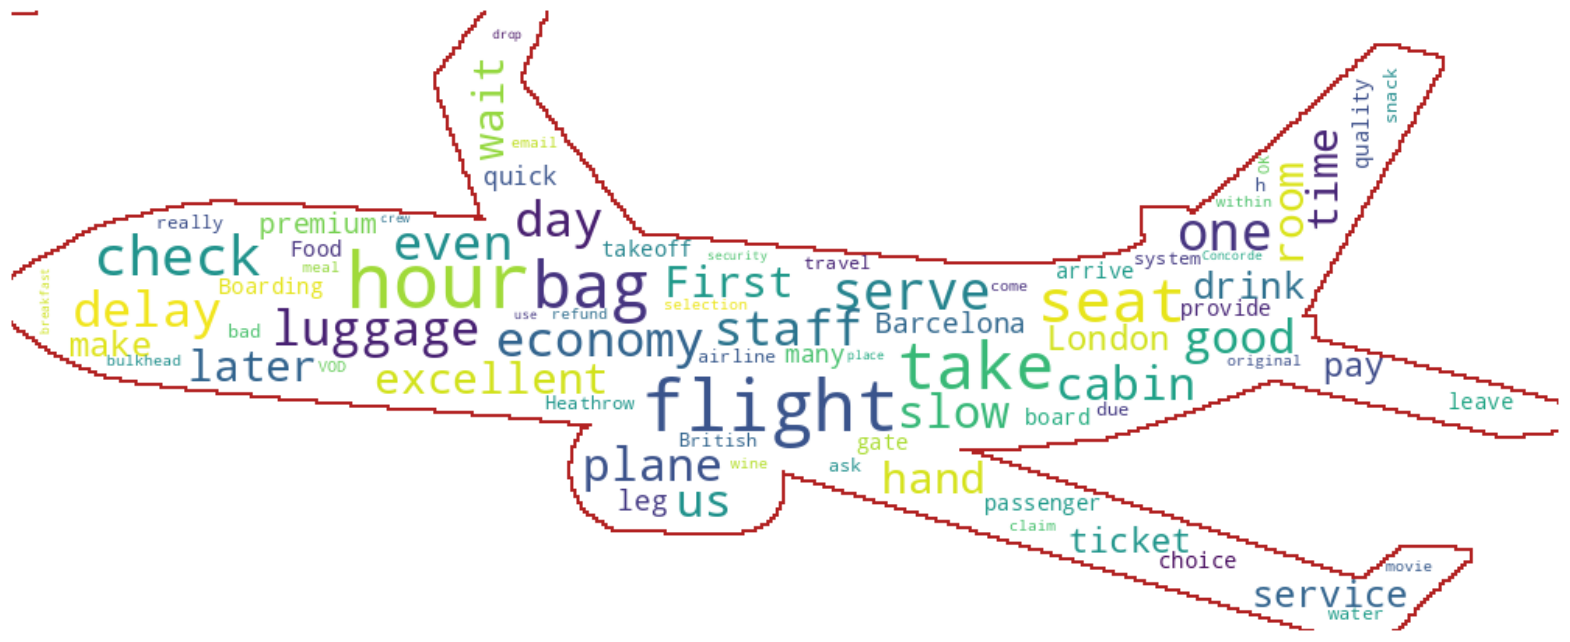

In [147]:
stopwords = set(STOPWORDS)
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=200, mask= transformed_plane_coloring, scale=2, max_font_size=25,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')

# Generate a wordcloud
wc.generate((str(df.Lemma)))

# store to file
#wc.to_file("img/wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

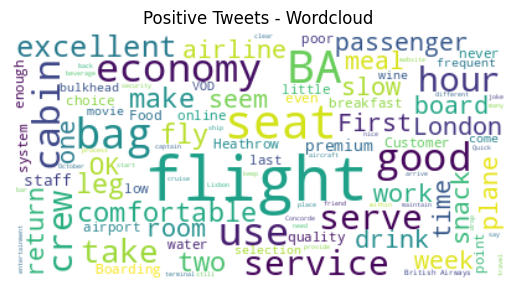

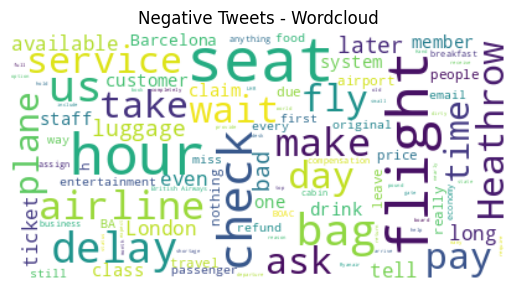

In [76]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = df.Lemma[df['Analysis'] == 'Positive']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative tweets
negative_tweets = df.Lemma[df['Analysis'] =='Negative']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
